In [ ]:
#For Mounting the google drive in colab notebook, to access files saved in the folder stored in drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#One line code to load the python script to work with "R" language in colab notebook.
#After loading this, each cell that needs execution in "R", should start with "%%R"
%load_ext rpy2.ipython

In [ ]:
%%R
library("tidyverse")
library("readr")
library("stringr")
library("dplyr")
library("ggplot2")

In [ ]:
%%R
#Importing the tidy data file 
Cleaned_data <- as_tibble(read_csv("/content/drive/MyDrive/IDMP PROJECT/cleaned_merged.csv"))

`summarise()` has grouped output by 'hit/not'. You can override using the `.groups` argument.


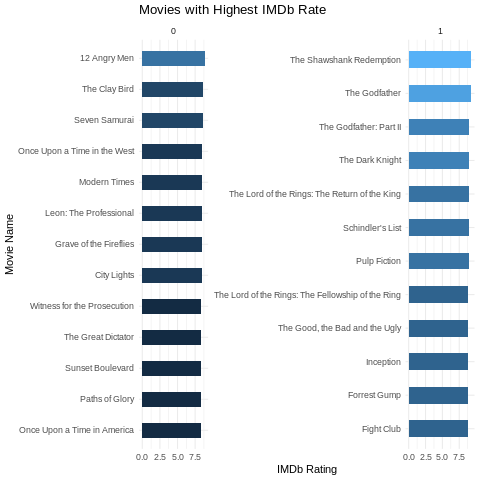

In [ ]:
%%R
#The top 20 Miovies with High IMDb Scores, For  hit and not hit movies  
top_imdb_movie <- Cleaned_data %>%
  group_by(`hit/not`) %>%
  top_n(10,wt=weighted_average_vote) %>%
  summarise(title, weighted_average_vote,`hit/not`) %>%
  arrange(desc(weighted_average_vote))

top_imdb_movie%>% ggplot(aes(x=reorder(title, weighted_average_vote), y=weighted_average_vote, fill=weighted_average_vote))+
  geom_col(width=0.5 ,show.legend = FALSE)+ 
  facet_wrap(~`hit/not`,scales = 'free')+
  coord_flip()+
  labs(x="Movie Name", y="IMDb Rating", title = "Movies with Highest IMDb Rate")+
  theme_minimal()

#From the above Figure we can see that the hit movies (hit/not=1), have demonstrated higher IMDb numbers in compared with the non-hit

Selecting by n


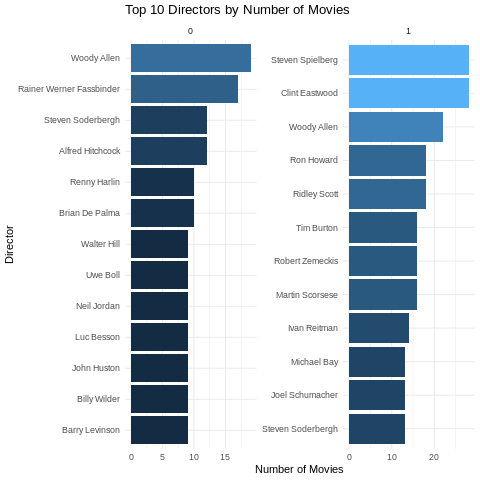

In [ ]:
%%R
#Top 10 directors for hit and not hit movies 

top_directors<- Cleaned_data %>%
  group_by(`hit/not`) %>%
  count(director, sort=TRUE) %>%
  top_n(10)%>%
  ggplot(aes(x=reorder(director, n), y=n, fill=n)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~`hit/not`,scales = 'free')+
  labs(x="Director", y="Number of Movies",title="Top 10 Directors by Number of Movies") +
  coord_flip() +
  theme_minimal()
top_directors

#Here we see that for hit moviies the number of movies the director has produced is more 

`summarise()` has grouped output by 'hit/not'. You can override using the `.groups` argument.


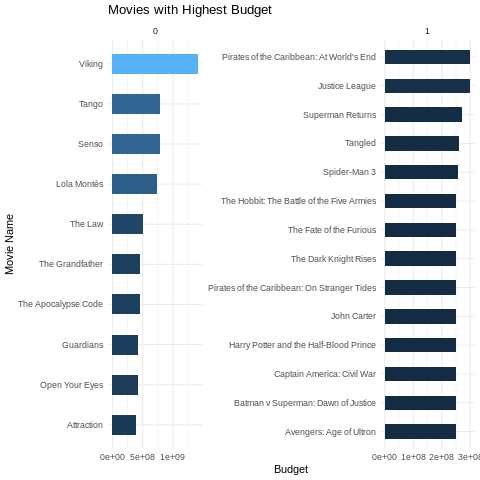

In [ ]:
%%R
#Movies with Highest budget faceted by hit or not hit  

highest_budgets <- Cleaned_data %>%
  group_by(`hit/not`) %>%
  top_n(10,wt=budget) %>%
  summarise(title, budget,`hit/not`) %>%
  arrange(desc(budget))

highest_budgets%>% ggplot(aes(x=reorder(title, budget), y=budget, fill=budget))+
  geom_col(width=0.5 ,show.legend = FALSE)+ 
  facet_wrap(~`hit/not`,scales = 'free')+
  coord_flip()+
  labs(x="Movie Name", y="Budget", title = "Movies with Highest Budget") + 
  theme_minimal()

#For some reason we can see that non hit movies have higher movie budgets 

`summarise()` has grouped output by 'hit/not'. You can override using the `.groups` argument.


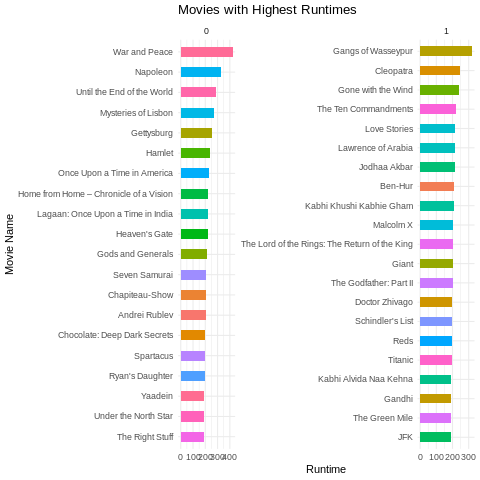

In [ ]:
%%R
#Movies with highest runtimes in terms of hit and non hit 
highest_runtimes <- Cleaned_data %>%
  group_by(`hit/not`)%>%
  top_n(20,wt=runtime) %>%
  summarise(title, runtime, `hit/not`) %>%
  arrange(desc(runtime))

highest_runtimes %>% ggplot(aes(x=reorder(title,runtime), y=runtime, fill=title))+
  geom_col(width=0.5 ,show.legend = FALSE)+ 
  facet_wrap(~`hit/not`,scales = 'free')+
  coord_flip()+
  labs(x="Movie Name", y="Runtime", title = "Movies with Highest Runtimes") + 
  theme_minimal()
#We can see that the movie with the highest runtime was a nonhit movie.The rest of the movies weather it was a hit or not demonstrated an average runtime no more that 200. 


R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



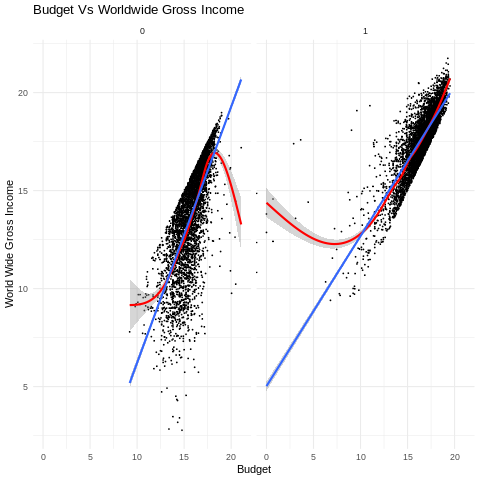

In [ ]:
%%R
# Scatter plot to see if there is any relationship between budget and worldwide gross income faceted by hit or not hit movie
budget_grossincome<- ggplot(data = Cleaned_data, mapping = aes(x = log(budget), y = log(worlwide_gross_income))) + 
  geom_point(size = 0.2) + labs(x="Budget", y="World Wide Gross Income", title= "Budget Vs Worldwide Gross Income")+ facet_wrap(~`hit/not`)+
  geom_smooth(color="red") + 
  geom_smooth(method = lm)+
  theme_minimal()

budget_grossincome

#From the above we can see that for both hit or not heat there is a positive relationship between budget and world wide gross income 


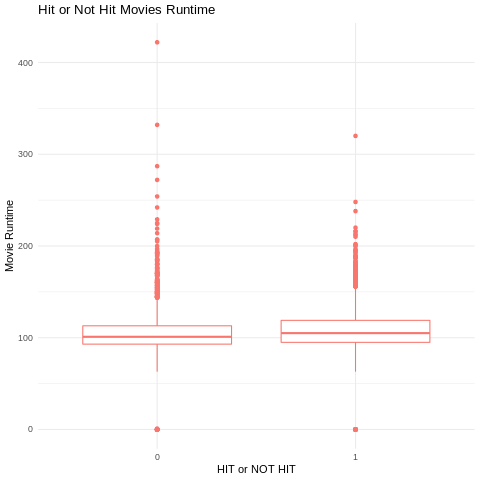

In [ ]:
%%R
#runtime vs hit not hit boxplot
run_time_budget<- ggplot(data = Cleaned_data, mapping = aes(y=runtime, color='`hit/not')) + 
  geom_boxplot(aes(x = as.character(`hit/not`)), show.legend = "False")+
  labs(y="Movie Runtime",x = "HIT or NOT HIT", title= "Hit or Not Hit Movies Runtime")+
  theme_minimal()
run_time_budget

#From the boxplot we can see that that most nonhit movies have demonstrated an average run time about 100 and for hit movies the average run time was a bit higher, both demonstrated right skewed model.

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



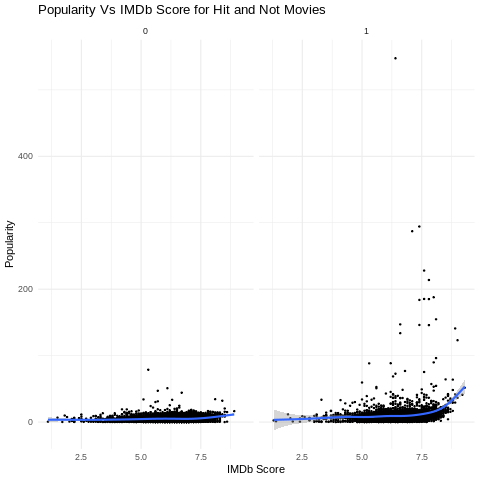

In [ ]:
%%R
#IMDb Score and popularity #weird
Vote_average_popularity<- ggplot(data = Cleaned_data, mapping = aes(x =weighted_average_vote, y = popularity)) + 
  geom_point(size=0.2)+ facet_wrap(~`hit/not`) + labs(x="IMDb Score",y="Popularity", title = "Popularity Vs IMDb Score for Hit and Not Movies")+
  geom_smooth()+theme_minimal()
Vote_average_popularity

#For both hit and non nit movies it showed a weird correlation between population and IMDb Score, where the popularity was relatively low, but it demonstrated a higher value for hit movies with higher 


R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



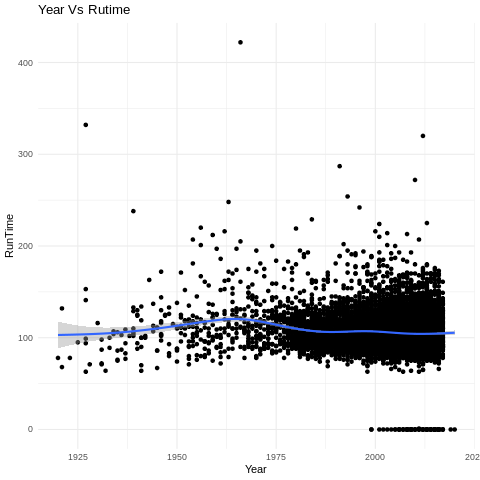

In [ ]:
%%R
#runtimevs released year 
runtime_vs_release_year<- ggplot(data = Cleaned_data, mapping = aes(x = year, y = runtime)) + 
  geom_point(size=0.2) + labs(x="Year",y="RunTime",title = "Year Vs Rutime")+
  geom_smooth()+theme_minimal()

runtime_vs_release_year

#We can see as the years increase we see higher runtimes 

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



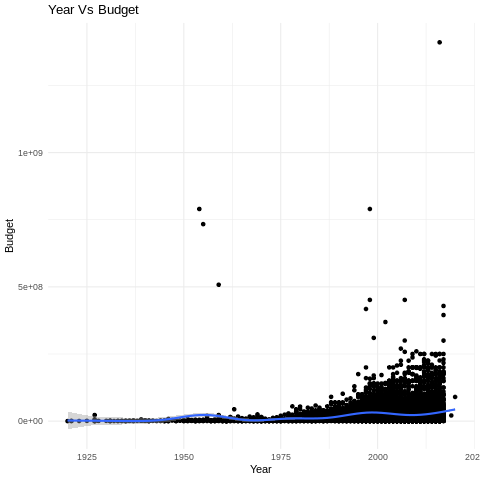

In [ ]:
%%R
#budgetvs release year
budget_vs_release_year<- ggplot(data = Cleaned_data, mapping = aes(x =year, y =budget )) + 
  geom_point(size = 0.2) +labs(x="Year",y="Budget",title = "Year Vs Budget")+
  geom_smooth()+theme_minimal()

budget_vs_release_year

#we also see that as the years increase the budget increases 

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



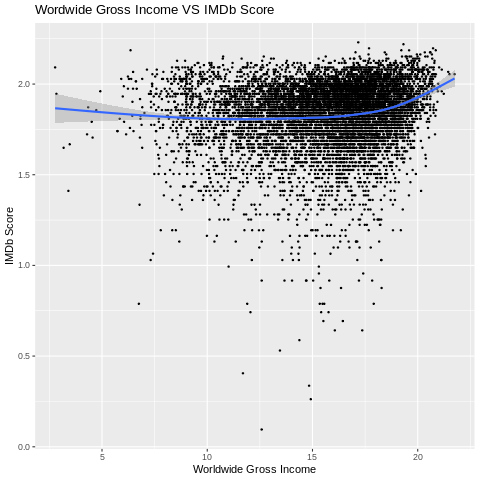

In [ ]:
%%R
#IMDB Score vs world_wide income 
world_vote<- ggplot(data = Cleaned_data, mapping = aes(x =log(worlwide_gross_income), y= log(weighted_average_vote) )) + 
  geom_point(size=0.5) + labs(x="Worldwide Gross Income", y= "IMDb Score", title = "Wordwide Gross Income VS IMDb Score")+
  geom_smooth()

world_vote


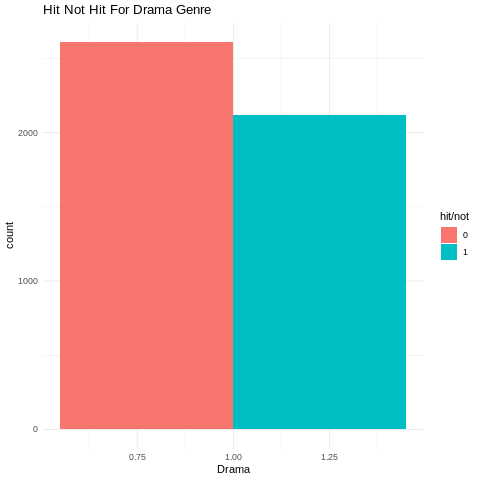

In [ ]:
%%R
# hit not hit agisnt drama
Drama_hit_not<- Cleaned_data %>% filter(Drama==1) %>%
  ggplot(aes(x=Drama, fill=as.factor(`hit/not`))) +
  geom_bar(position = "dodge") +
  scale_fill_discrete(name="hit/not") +
  labs(title="Hit Not Hit For Drama Genre") +
  theme_minimal()

Drama_hit_not

#we can see for Drama (genre) that movies that were not hit were more in the drama genre 


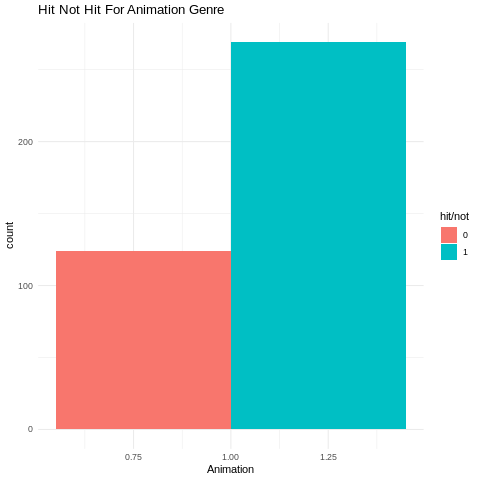

In [ ]:
%%R
Animation_hit_not<- Cleaned_data %>% filter(Animation==1) %>%
  ggplot(aes(x=Animation, fill=as.factor(`hit/not`))) +
  geom_bar(position = "dodge") +
  scale_fill_discrete(name="hit/not") +
  labs(title="Hit Not Hit For Animation Genre") +
  theme_minimal()

Animation_hit_not

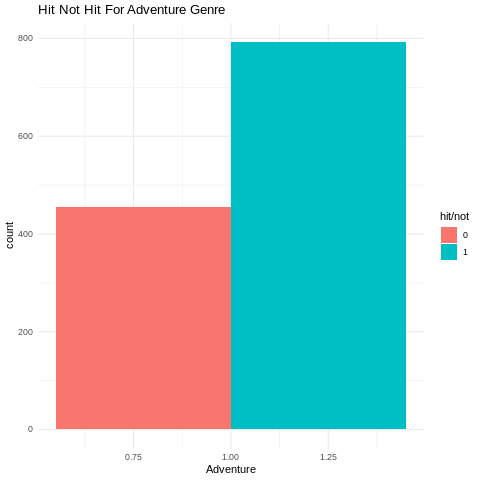

In [ ]:
%%R
#hot not hit for Adventure 
Adventure_hit_not<- Cleaned_data %>% filter(Adventure==1) %>%
  ggplot(aes(x=Adventure, fill=as.factor(`hit/not`))) +
  geom_bar(position = "dodge") +
  scale_fill_discrete(name="hit/not") +
  labs(title="Hit Not Hit For Adventure Genre") +
  theme_minimal()

Adventure_hit_not

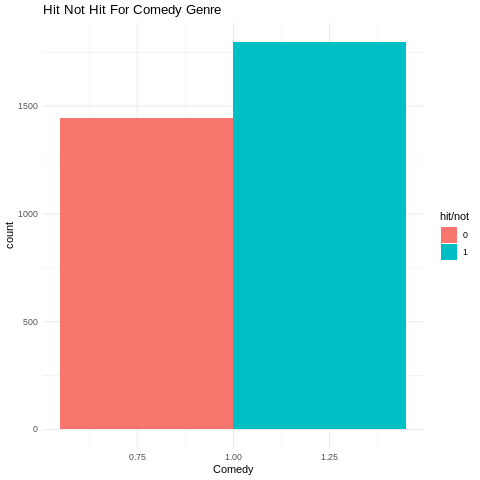

In [ ]:
%%R
Comedy_hit_not<- Cleaned_data %>% filter(Comedy==1) %>%
  ggplot(aes(x=Comedy, fill=as.factor(`hit/not`))) +
  geom_bar(position = "dodge") +
  scale_fill_discrete(name="hit/not") +
  labs(title="Hit Not Hit For Comedy Genre") +
  theme_minimal()
Comedy_hit_not

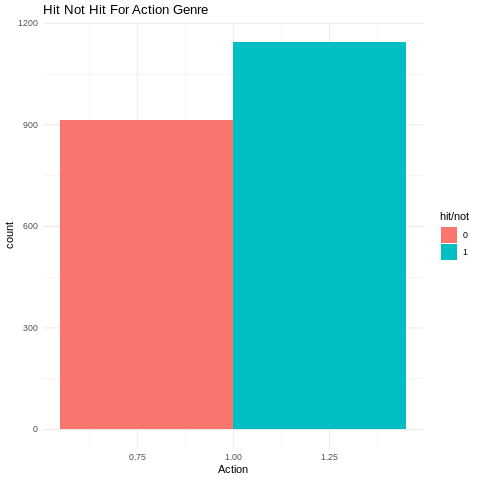

In [ ]:
%%R
Action_hit_not<- Cleaned_data %>% filter(Action==1) %>%
  ggplot(aes(x=Action, fill=as.factor(`hit/not`))) +
  geom_bar(position = "dodge") +
  scale_fill_discrete(name="hit/not") +
  labs(title="Hit Not Hit For Action Genre") +
  theme_minimal()

Action_hit_not

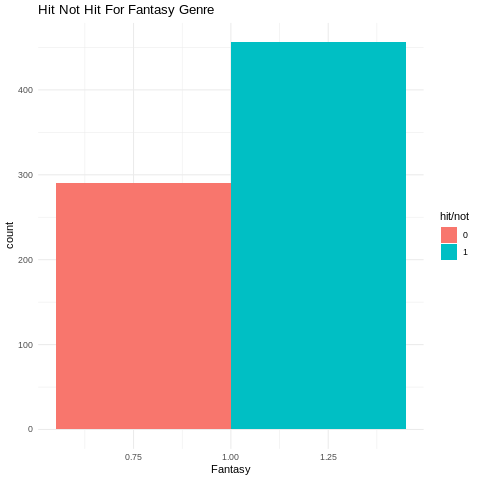

In [ ]:
%%R
Fantasy_hit_not<- Cleaned_data %>% filter(Fantasy==1) %>%
  ggplot(aes(x=Fantasy, fill=as.factor(`hit/not`))) +
  geom_bar(position = "dodge") +
  scale_fill_discrete(name="hit/not") +
  labs(title="Hit Not Hit For Fantasy Genre") +
  theme_minimal()

Fantasy_hit_not

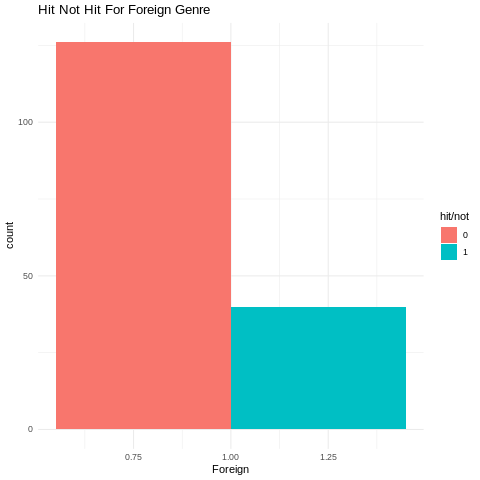

In [ ]:
%%R
Foreign_hit_not<- Cleaned_data %>% filter(Foreign==1) %>%
  ggplot(aes(x=Foreign, fill=as.factor(`hit/not`))) +
  geom_bar(position = "dodge") +
  scale_fill_discrete(name="hit/not") +
  labs(title="Hit Not Hit For Foreign Genre") +
  theme_minimal()

Foreign_hit_not

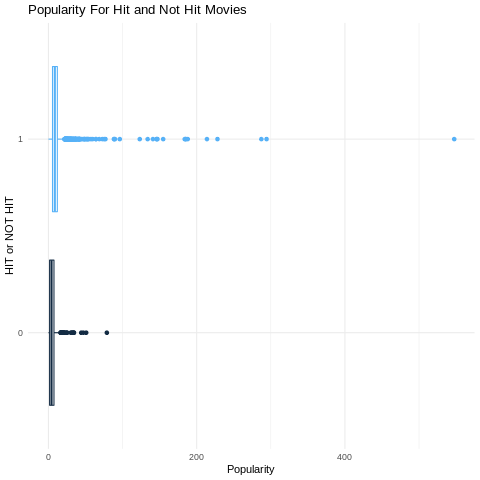

In [ ]:
%%R
# hit not hit with popularity
popularity_hit_not<- ggplot(data = Cleaned_data, mapping = aes(x=popularity)) + 
  geom_boxplot(aes(y = as.character(`hit/not`), color=`hit/not`), show.legend = FALSE)+
  labs(x="Popularity",y = "HIT or NOT HIT", title="Popularity For Hit and Not Hit Movies")+
  theme_minimal()

popularity_hit_not

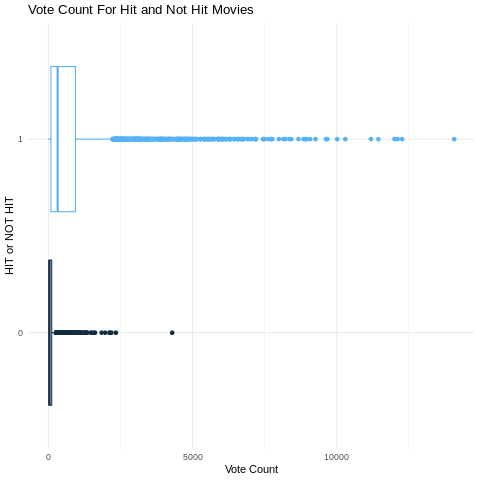

In [ ]:
%%R
Votecount_hit_not<- ggplot(data = Cleaned_data, mapping = aes(x=vote_count)) + 
  geom_boxplot(aes(y = as.character(`hit/not`), color=`hit/not`), show.legend = FALSE)+
  labs(x="Vote Count",y = "HIT or NOT HIT", title="Vote Count For Hit and Not Hit Movies")+
  theme_minimal()


Votecount_hit_not